In [6]:
import os
from PIL import Image
import zipfile

import sys
sys.path.append('../src')

import files_summary


def get_img_fpath_list(info_dict):

    img_subpaths = info_dict['filename'][info_dict['is_image']]

    return img_subpaths


def get_random_sample_of_img_names(info_dict, num_images = 25):
    
    img_subpaths = info_dict['filename'][info_dict['is_image']]
    img_names = np.random.choice(img_subpaths, num_images, replace=False )

    return img_names



def calculate_thumbsize(num_images_in_zip, collage_size=(750,750), min_thumb_len=50):


    max_thumb_len = collage_size[0]
    # how large would be thumbnails be if we plotted all images
    num_per_side_all = np.ceil(np.sqrt(num_images_in_zip))
    thumbsize_all = collage_size[0] / num_per_side_all

    thumb_len = max(min_thumb_len, thumbsize_all)
    thumbsize = (thumb_len, thumb_len)

    num_per_side_actual = int(np.ceil(collage_size[0]/thumbsize[0]))

    return thumbsize, num_per_side_actual


def create_collage(zipfile_obj,
                   img_names, 
                   imgs_per_side=15,
                   thumb_size=(50,50), 
                   collage_size=(750,750)):

    num_imgs = len(img_names)

    x_offset = 0
    y_offset = 0
    ctr = 0

    collage = Image.new("RGBA", collage_size)

    for y in range(imgs_per_side):

        for x in range(imgs_per_side):

            img_name = img_names[ctr]

            with zipfile_obj.open(img_name, mode='r') as img_file:
                img = Image.open(img_file)
                img.thumbnail(size=thumb_size)
                collage.paste(img, (x_offset, y_offset))
            
            x_offset += thumb_size[0]
            ctr += 1
            if ctr >= num_imgs:
                break

        x_offset = 0
        y_offset += thumb_size[1]

    return collage



In [16]:
def main(info_dict):

    img_subpaths = get_img_fpath_list(info_dict)

    num_images_in_zip = len(img_subpaths)
    min_thumb_len=200
    collage_size=(800,800)


    thumbsize, imgs_per_side = calculate_thumbsize(num_images_in_zip, 
                                                collage_size=collage_size, 
                                                min_thumb_len=min_thumb_len)

    num_images_to_show = int(imgs_per_side**2)
    percentage = (num_images_to_show/num_images_in_zip )
    print('showing {:.2%} of images'.format(percentage))
    img_names = get_random_sample_of_img_names(info_dict, num_images=num_images_to_show)

    collage = create_collage(zipfile_obj,
                            img_names, 
                            thumb_size=thumbsize, 
                            collage_size=collage_size,
                            imgs_per_side=imgs_per_side)
    
    collage.show()
    collage.save('../data/collage.png')

    return collage


# Main

showing 4.47% of images


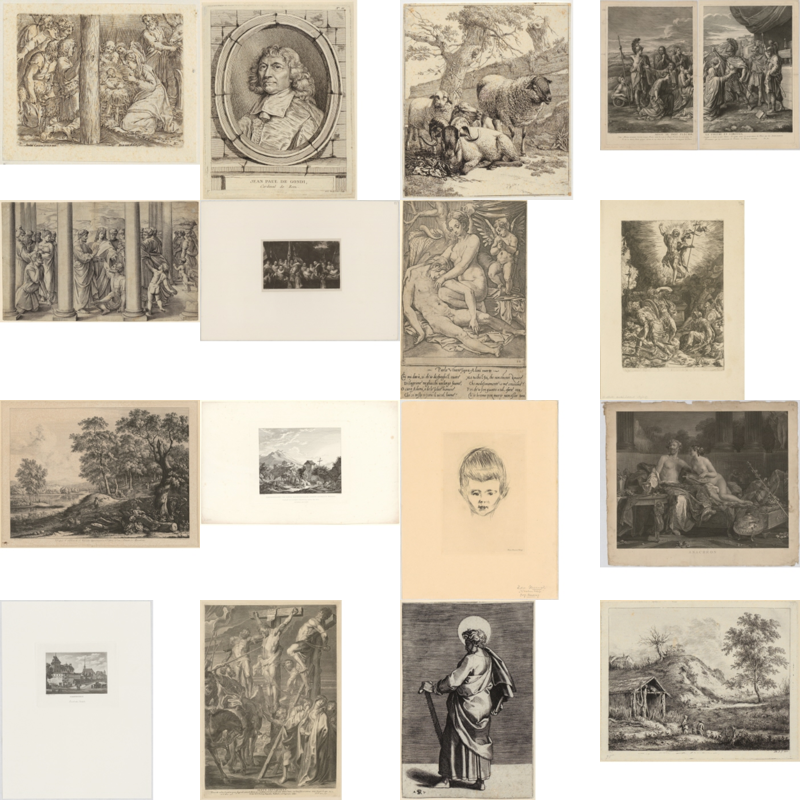

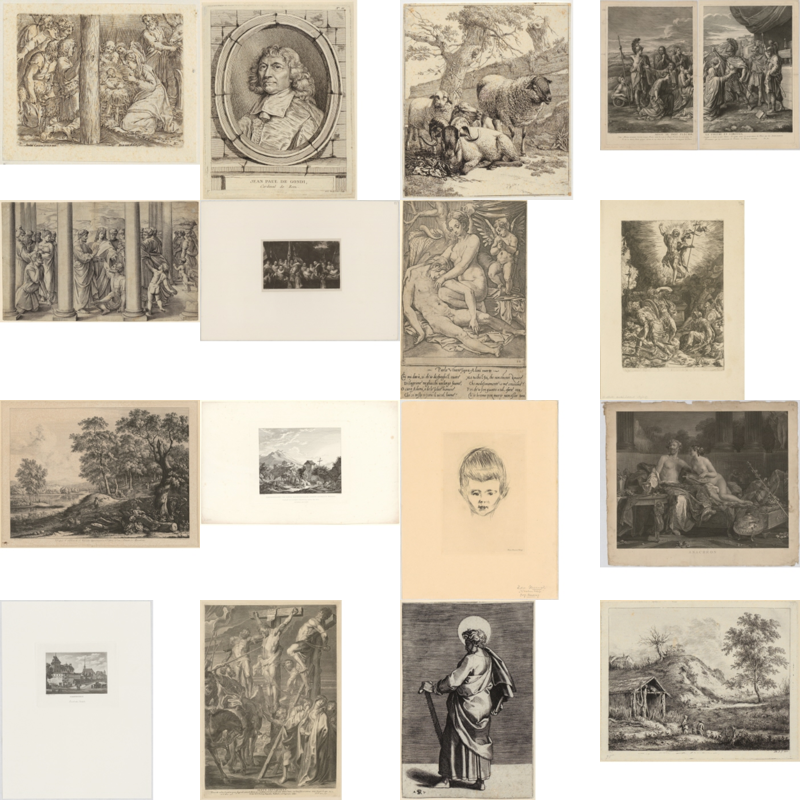

In [19]:
fpath = "../data/raw/graphische_sammlung_sample.zip"
zipfile_obj = zipfile.ZipFile(fpath, "r")

infolist = zipfile_obj.infolist()
info_dict = files_summary.infolist_to_dict(infolist)
collage = main(info_dict)


In [18]:

# img_names = get_random_sample_of_img_names(info_dict, num_images=int(imgs_per_side**2))
# collage = create_collage(zipfile_obj, img_names, )
# collage.show()
